In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [2]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset to a variable
data = pd.read_csv("K:/CIC-2017-dataset/CIC-IDS-2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")


In [4]:
# skew distribution
data.skew()

 Destination Port                 1.882213
 Flow Duration                    2.883252
 Total Fwd Packets              187.174787
 Total Backward Packets         186.445394
Total Length of Fwd Packets     212.797897
 Total Length of Bwd Packets    189.322395
 Fwd Packet Length Max           11.967434
 Fwd Packet Length Min           22.449272
 Fwd Packet Length Mean          12.421745
 Fwd Packet Length Std            7.267489
Bwd Packet Length Max             3.011906
 Bwd Packet Length Min            4.799550
 Bwd Packet Length Mean           3.356727
 Bwd Packet Length Std            2.423119
Flow Bytes/s                           NaN
 Flow Packets/s                        NaN
 Flow IAT Mean                    9.618882
 Flow IAT Std                     7.060611
 Flow IAT Max                     5.002253
 Flow IAT Min                    21.824432
Fwd IAT Total                     2.921346
 Fwd IAT Mean                     8.069165
 Fwd IAT Std                      7.904365
 Fwd IAT Ma

In [5]:
data = data.rename(columns={"Flow Bytes/s":"Flow Bytes", " Flow Packets/s":"Flow Packets", "Fwd Packets/s":"Fwd Packets", " Bwd Packets/s":"Bwd Packets"})


In [6]:
data = data.drop([" Bwd PSH Flags",  # 0
           " Fwd URG Flags",  # 0
           " Bwd URG Flags",
           " CWE Flag Count",
           "Fwd Avg Bytes/Bulk",  # 0
           " Fwd Avg Packets/Bulk", # 0
           " Fwd Avg Bulk Rate",  # 0
           " Bwd Avg Bytes/Bulk",  # 0
           " Bwd Avg Packets/Bulk", # 0
           "Bwd Avg Bulk Rate",
            "Flow Bytes","Flow Packets"], axis=1)

In [7]:
# grouping by forest cover type and calculating total occurance
data.groupby(' Label').size()   # (445909, 67)

 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
dtype: int64

In [8]:
data.loc[data[' Label'] == 'BENIGN'] = 0
data.loc[data[' Label'] == 'FTP-Patator'] = 1
data.loc[data[' Label'] == 'SSH-Patator'] = 2

In [9]:
# feeding all our features to var 'X'
X = data.iloc[:,:-1]   # (445909, 66)
# feeding our target variable to var 'y'
y = data[' Label']

In [10]:
y.shape

(445909,)

In [11]:
data.shape

(445909, 67)

In [12]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 53)

In [13]:
from keras.models import Sequential
from keras import initializers
from keras.layers import Dense
from keras.utils import np_utils

model = Sequential()
model.add(Dense(4, input_dim=66, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=1, batch_size=10)
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1
111478/111478 [==============================] - 2s 19us/step

acc: 98.68%


In [15]:
def NNfun( hlayers ):
 model1=Sequential()
 model1.add(Dense(4, input_dim=66, activation='relu'))
 for x in range(hlayers-1):
     model1.add(Dense(4, activation='relu'))
 model1.add(Dense(1,activation='sigmoid'))
 model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 model1.fit(X_train, y_train,epochs=1, batch_size=10)
 scores1 = model1.evaluate(X_test, y_test)
 return scores1;

In [16]:
def NNfunw(  ):
 model1=Sequential()
 myinit=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
 model1.add(Dense(4, input_dim=66, kernel_initializer=myinit,
                bias_initializer='zeros', activation='relu'))
 model1.add(Dense(1,activation='sigmoid'))
 model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 model1.fit(X_train, y_train,epochs=1, batch_size=10)
 scores1 = model1.evaluate(X_test, y_test)
 return scores1;

Epoch 1/1
111478/111478 [==============================] - 2s 21us/step
Epoch 1/1
111478/111478 [==============================] - 3s 22us/step
Epoch 1/1
111478/111478 [==============================] - 3s 24us/step
Epoch 1/1
111478/111478 [==============================] - 4s 31us/step
Epoch 1/1
111478/111478 [==============================] - 3s 28us/step
Epoch 1/1
111478/111478 [==============================] - 3s 31us/step


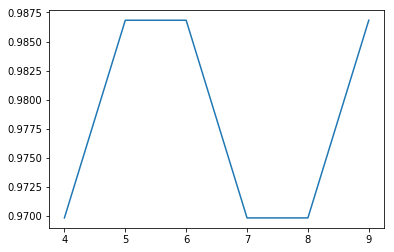

In [17]:
Hypl=[]
for x in range(4,10):
 scr1 = NNfun(x)
 Hypl=Hypl + scr1
import matplotlib.pyplot as plt
Hypl1=[Hypl[1],Hypl[3],Hypl[5],Hypl[7],Hypl[9],Hypl[11]]
plt.plot([4,5,6,7,8,9],Hypl1)
plt.show()

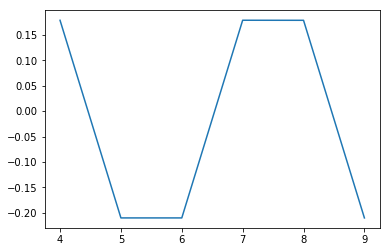

In [18]:
Hypl2=[Hypl[0],Hypl[2],Hypl[4],Hypl[6],Hypl[8],Hypl[10]]
plt.plot([4,5,6,7,8,9],Hypl2)
plt.show()

In [19]:
Hypr=[]
for x in range(1,5):
 scr2 = NNfunw()
 Hypr=Hypr + scr1

Epoch 1/1
111478/111478 [==============================] - 3s 26us/step
Epoch 1/1
111478/111478 [==============================] - 3s 27us/step
Epoch 1/1
111478/111478 [==============================] - 3s 27us/step
Epoch 1/1
111478/111478 [==============================] - 3s 30us/step


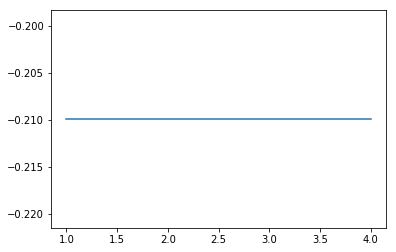

In [20]:
Hypr1=[Hypr[0],Hypr[2],Hypr[4],Hypr[6]]
plt.plot([1,2,3,4],Hypr1)
plt.show()

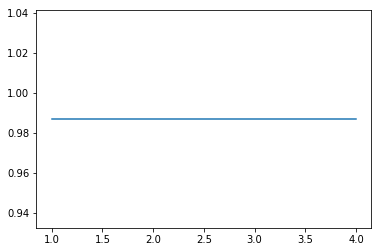

In [21]:
Hypr2=[Hypr[1],Hypr[3],Hypr[5],Hypr[7]]
plt.plot([1,2,3,4],Hypr2)
plt.show()